In [3]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from tqdm.notebook import tqdm_notebook
from scipy import signal


In [4]:
df = pd.read_csv(r"C:\Users\kumar\Downloads\Capstone_Final_Avengers\Capstone Final\FHLB_Data_Set.csv")

# 1. Providing Descriptions of our Sample 

## Number of Observations and rows in the Dataset

## HousePrice

In [5]:
df['HousePrice'] = df['NoteAmount'] / (df['LTVRatioPercent'] / 100)


## Datatypes of the Variables

In [6]:
df.head()

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType,HousePrice
0,2010,1,Boston,4,13,99999,101.0,3.64,85567,44769,...,6,6,2,6,6,6,6,3,1,4.099404e+05
1,2010,2,Boston,9,1,99999,726.0,24.22,44167,64875,...,6,6,2,6,6,6,6,3,1,1.919912e+05
2,2010,3,Boston,9,1,99999,612.0,11.32,65361,64875,...,6,6,5,8,8,8,8,3,1,2.749924e+05
3,2010,4,Boston,9,1,99999,431.0,17.00,93984,64875,...,6,6,2,6,6,6,6,3,1,1.050053e+06
4,2010,5,Boston,9,1,99999,2302.0,5.32,86553,64875,...,6,6,2,6,6,6,6,3,1,4.492308e+05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693331 entries, 0 to 693330
Data columns (total 57 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             693331 non-null  int64  
 1   LoanCharacteristicsID            693331 non-null  int64  
 2   Bank                             693331 non-null  object 
 3   FIPSStateNumericCode             693331 non-null  int64  
 4   FIPSCountyCode                   693331 non-null  int64  
 5   CoreBasedStatisticalAreaCode     693331 non-null  int64  
 6   CensusTractIdentifier            693331 non-null  float64
 7   CensusTractMinorityRatioPercent  693331 non-null  float64
 8   CensusTractMedFamIncomeAmount    693331 non-null  int64  
 9   LocalAreaMedianIncomeAmount      693331 non-null  int64  
 10  TotalMonthlyIncomeAmount         693331 non-null  int64  
 11  HUDMedianIncomeAmount            693331 non-null  int64  
 12  Lo

## Summary Statistics of each variable

In [32]:
df.describe()

,Year,LoanCharacteristicsID,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,...,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType,HousePrice
count,693331.000000,6.933310e+05,693331.000000,693331.000000,693331.000000,693331.000000,693331.000000,693331.000000,693331.000000,6.933310e+05,...,693331.000000,693331.000000,693331.000000,693331.000000,693331.000000,693331.000000,693331.000000,693331.000000,693331.0,6.933310e+05
mean,2016.199455,1.560534e+06,28.861007,85.131099,40314.069170,3100.446973,14.321825,77896.142053,66043.282682,7.275480e+04,...,6.297875,6.297897,3.217297,6.968961,6.971379,6.971455,6.971465,2.659946,1.0,2.937499e+05
std,3.443245,1.087803e+06,13.179897,69.248296,28497.571982,3871.233286,16.086175,29173.896163,14162.192926,1.091972e+05,...,0.457438,0.457344,1.464119,0.909852,0.905844,0.905729,0.905713,0.473779,0.0,3.059139e+05
min,2010.000000,1.000000e+00,1.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,...,1.000000,5.000000,1.000000,1.000000,3.000000,4.000000,5.000000,1.000000,1.0,1.300000e+04
25%,2013.000000,3.475500e+04,19.000000,35.000000,19380.000000,106.000000,4.210000,57829.000000,56217.000000,1.136100e+04,...,6.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.000000,2.000000,1.0,1.600000e+05
50%,2017.000000,2.084072e+06,26.000000,73.000000,31080.000000,535.050000,8.440000,72292.000000,65889.000000,5.606400e+04,...,6.000000,6.000000,2.000000,7.000000,7.000000,7.000000,7.000000,3.000000,1.0,2.440000e+05
75%,2019.000000,2.470896e+06,39.000000,121.000000,44140.000000,7012.060000,17.630000,92339.000000,74278.000000,1.023360e+05,...,7.000000,7.000000,5.000000,8.000000,8.000000,8.000000,8.000000,3.000000,1.0,3.636364e+05
max,2021.000000,2.690373e+06,78.000000,840.000000,99999.000000,47700.000000,100.000000,250001.000000,150332.000000,3.617821e+07,...,7.000000,7.000000,5.000000,8.000000,8.000000,8.000000,8.000000,3.000000,1.0,4.350475e+07


# 2. Checking For Missing Data

## Exploring Duplicates

In [33]:
#Does the dataframe have duplicates?
df.duplicated().any()

False

In [34]:
# 'eq' method of Binary operator functions get equal to that of Dataframe and other,element-wise binary operator equal
#,'Any' method of computations/descriptive stats returns whether any element is true,potentially over an axis.
df[df.eq('?').any(1)]

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType,HousePrice


In [35]:
#Finding the NaN values
#isna method of 'Missing data handling' detects missing values and any() method of 'computations/descriptive stats' returns whether 
#any element is true potentially over an axis.
df[df.columns[df.isna().any()]]

""
0
1
2
3
4
...
693326
693327
693328
693329


In [36]:
# Replace '?' with None
#'Replace' method of Missing Data Handling replace values given in to_replace with value
df= df.replace(to_replace='?', value='NaN')

# 'eq' method of Binary operator functions get equal to that of Dataframe and other,element-wise binary operator equal
#,'Any' method of computations/descriptive stats returns whether any element is true,potentially over an axis.
df[df.eq('?').any(1)]

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType,HousePrice


# 3. Visualization (identify the shape of your data)

# 5:Detecting and Handling Outliers

# 4.Correlation

# 5.Model

In [16]:
df.drop(['Bank', 'PropertyType','PrepaymentPenaltyExpirationDate','ProductCategoryName','IndexSourceType','LienPriorityType'], axis=1, inplace=True)

## 6.1 Visual Inspection

## 6.2 Rolling Statistics

C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


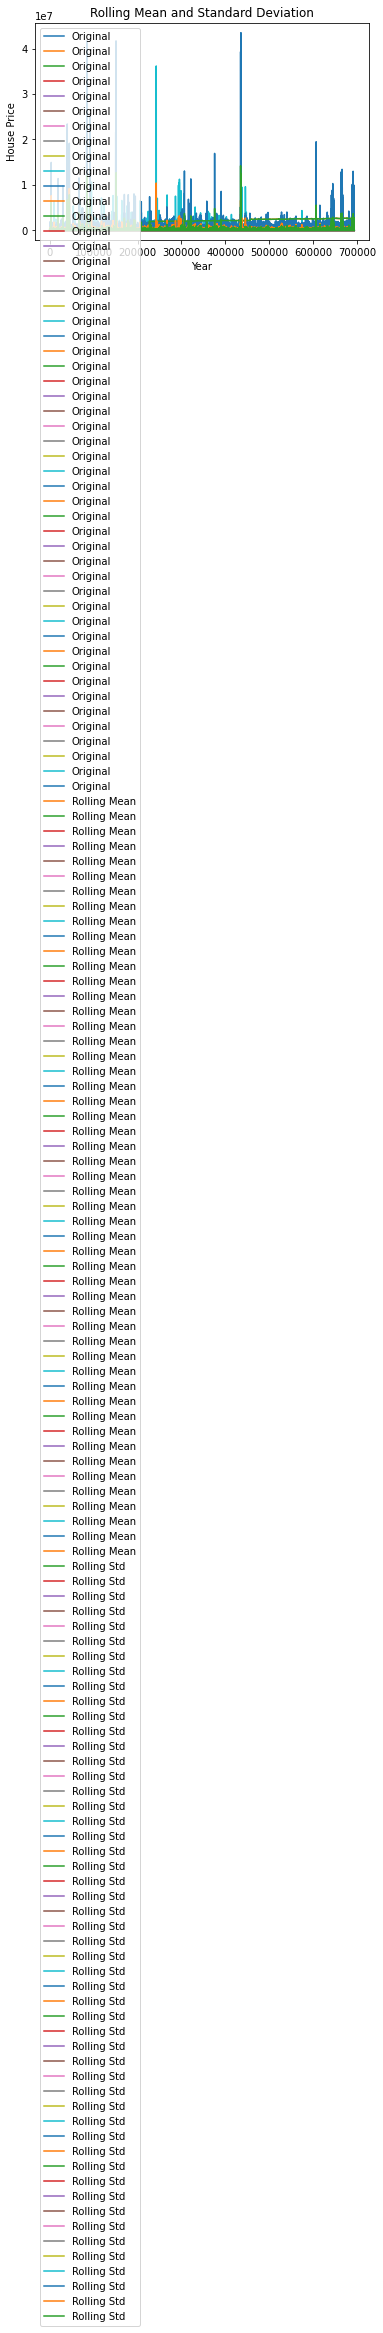

In [38]:
# Calculate rolling statistics
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

# Plot rolling statistics
plt.plot(df, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.xlabel('Year')
plt.ylabel('House Price')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.show()


The significance level in the above code is 0.05, which is the default value used by the adfuller() function in the statsmodels.tsa.stattools module. It represents the level of significance at which we want to test the null hypothesis that the time series is non-stationary. If the p-value of the test is less than the significance level, then we can reject the null hypothesis and conclude that the time series is stationary. In this case, the p-value is 0.0 which is less than the significance level of 0.05, therefore we can reject the null hypothesis and conclude that the time series is stationary.

## 6.3 Augmented Dickey-Fuller test ADF

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['HousePrice'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


ADF Statistic: -40.027638059870355
p-value: 0.0
Critical Values:
	1%: -3.4303594332595924
	5%: -2.861544169392268
	10%: -2.5667722192147546


C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


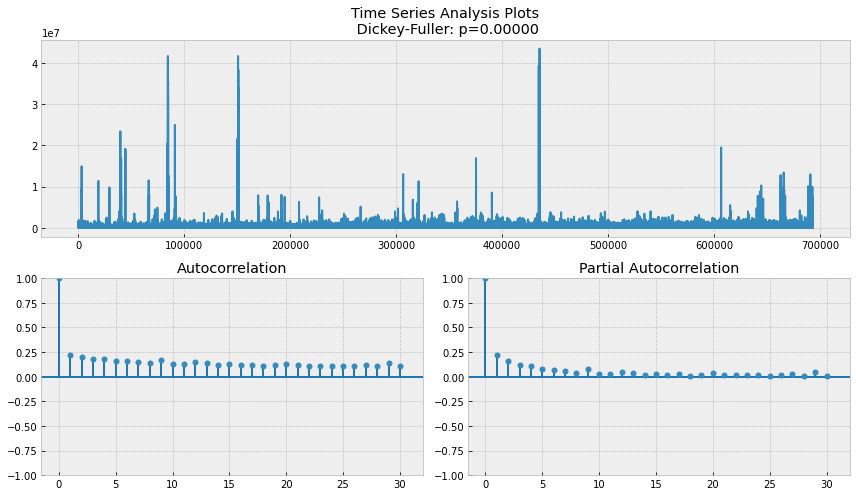

In [13]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(df.HousePrice, lags=30)

C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


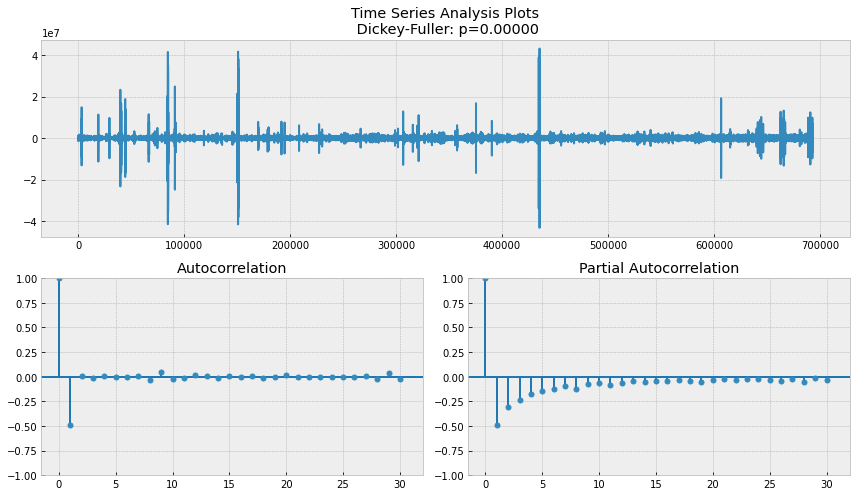

In [14]:
data_diff = df.HousePrice - df.HousePrice.shift(1)

tsplot(data_diff[1:], lags=30)

C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


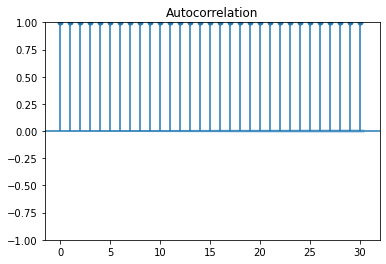

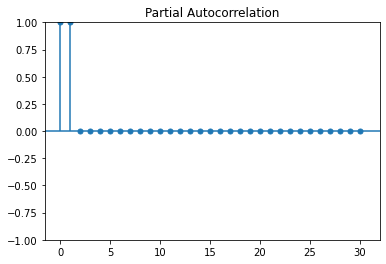

In [45]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
data = df['Year']

# Calculate the ACF and PACF
acf = plot_acf(data, lags=30)
pacf = plot_pacf(data, lags=30)

# Look for significant spikes or peaks at multiples of lags
# The seasonal period can be estimated as the lag corresponding to the first significant spike or peak


In [41]:
from itertools import product

#Set initial values and some bounds
ps = range(0, 3)
d = 0
qs = range(0, 3)
Ps = range(0, 3)
D = 0
Qs = range(0, 3)
s = 1

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

81

In [ ]:

def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(df.HousePrice, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)


  0%|          | 0/81 [00:00<?, ?it/s]

MemoryError: Unable to allocate 58.2 MiB for an array with shape (11, 693331) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 986, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions.MemoryError: Unable to allocate 58.2 MiB for an array with shape (11, 693331) and data type float64


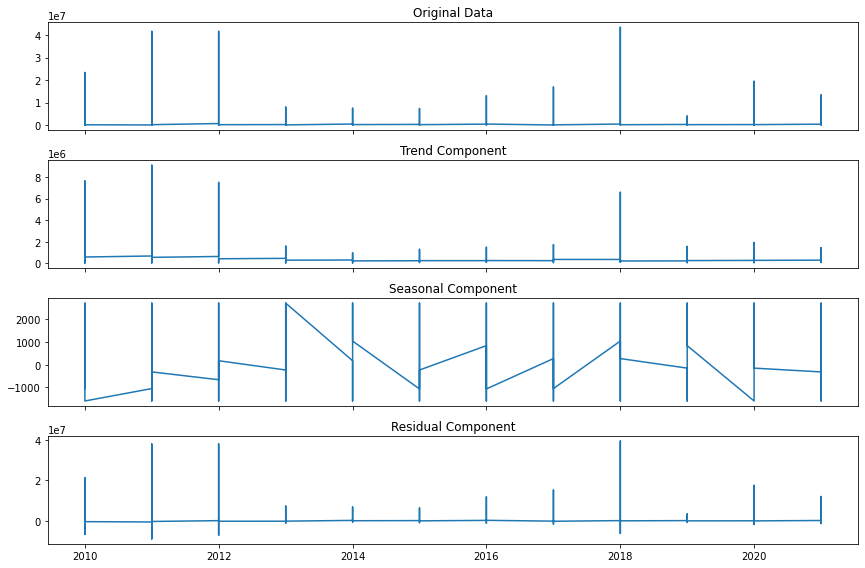

In [27]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the time series data
df = pd.read_csv(r"C:\Users\Avinash Rauniyar\Desktop\Spring 2023\Capstone\Fujian\OneDrive_2023-01-26\FHLB Data\Final Data Kumar.csv",index_col=0, parse_dates=True)
df['HousePrice'] = df['NoteAmount'] / (df['LTVRatioPercent'] / 100)
df.drop(['Bank', 'PropertyType','PrepaymentPenaltyExpirationDate','ProductCategoryName','IndexSourceType','LienPriorityType'], axis=1, inplace=True)

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['HousePrice'], period=12)

# Plot the original data, trend, seasonal, and residual components
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
axs[0].plot(df['HousePrice'])
axs[0].set_title('Original Data')
axs[1].plot(decomposition.trend)
axs[1].set_title('Trend Component')
axs[2].plot(decomposition.seasonal)
axs[2].set_title('Seasonal Component')
axs[3].plot(decomposition.resid)
axs[3].set_title('Residual Component')
plt.tight_layout()
plt.show()


C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


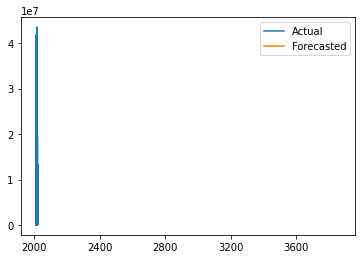

In [11]:

df = pd.read_csv(r"C:\Users\Avinash Rauniyar\Desktop\Spring 2023\Capstone\Fujian\OneDrive_2023-01-26\FHLB Data\Final Data Kumar.csv",index_col=0, parse_dates=True)
df['HousePrice'] = df['NoteAmount'] / (df['LTVRatioPercent'] / 100)
df.drop(['Bank', 'PropertyType','PrepaymentPenaltyExpirationDate','ProductCategoryName','IndexSourceType','LienPriorityType'], axis=1, inplace=True)

# Define the SARIMA model
order = (0, 0, 1) # (p, d, q)
seasonal_order = (2, 0, 2, 2) # (P, D, Q, S)
model = sm.tsa.statespace.SARIMAX(df['HousePrice'], order=order, seasonal_order=seasonal_order)


#(2, 1, 2, 1)  1.953624e+07

#ps = range(0, 3)
#d = 0
#qs = range(0, 3)
#Ps = range(0, 3)
#D = 0
#Qs = range(0, 3)
#s = 1


# Fit the model
results = model.fit()

# Obtain the forecasted values
forecast = results.get_forecast(steps=1)
forecasted_values = forecast.predicted_mean

forecasted_values

# Plot the actual and forecasted values
plt.plot(df['HousePrice'], label='Actual')
plt.plot(forecasted_values, label='Forecasted')
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

def smape(y_true, y_pred):
    """
    Calculates the Symmetric Mean Absolute Percentage Error (SMAPE) between the actual and predicted values.
    """
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Split the data into training and testing sets with 70-30 split
train, test = train_test_split(df['HousePrice'], test_size=0.3, shuffle=False)

# Verify the sizes of the training and testing sets
print("Training set size:", len(train))
print("Testing set size:", len(test))

# Define the SARIMA model
order = (0, 0, 1) # (p, d, q)
seasonal_order = (2, 0, 2, 2) # (P, D, Q, S)
model = sm.tsa.statespace.SARIMAX(train, order=order, seasonal_order=seasonal_order)

# Fit the model on the train set
results = model.fit()

# Generate the forecast for the test set
forecast = results.get_forecast(steps=len(test))
forecasted_values = forecast.predicted_mean

# Calculate the RMSE between the actual and forecasted values
rmse = np.sqrt(mean_squared_error(test, forecasted_values))
print('RMSE:', rmse)

smape_val = smape(test, forecasted_values)
print('SMAPE:', '{:.2%}'.format(smape_val/100))

mape_val = np.mean(np.abs((test - forecasted_values) / test)) * 100
print('MAPE:', '{:.2%}'.format(mape_val/100))


Training set size: 485331
Testing set size: 208000
RMSE: 395024.48613444145
SMAPE: 185.77%
MAPE: 95.14%


In [29]:
from sklearn.model_selection import TimeSeriesSplit

# Split the data into training and testing sets with a TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df['HousePrice']):
    train, test = df['HousePrice'].iloc[train_index], df['HousePrice'].iloc[test_index]
    
    # Define the SARIMA model
    order = (0, 0, 1) # (p, d, q)
    seasonal_order = (2, 0, 2, 2) # (P, D, Q, S)

    model = sm.tsa.statespace.SARIMAX(train, order=order, seasonal_order=seasonal_order)

    # Fit the model on the train set
    results = model.fit(start_params=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1], method='nm', maxiter=100, full_output=True, disp=True)


    # Generate the forecast for the test set
    forecast = results.get_forecast(steps=len(test))
    forecasted_values = forecast.predicted_mean

    # Calculate the RMSE between the actual and forecasted values
    rmse = np.sqrt(mean_squared_error(test, forecasted_values))
    print('RMSE:', rmse)

    smape_val = smape(test, forecasted_values)
    print('SMAPE:', '{:.2%}'.format(smape_val/100))

    mape_val = np.mean(np.abs((test - forecasted_values) / test)) * 100
    print('MAPE:', '{:.2%}'.format(mape_val/100))
    
    print('\n')


C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 425957.7090300915
SMAPE: 199.87%
MAPE: 100.06%




C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 370198.5881665609
SMAPE: 199.58%
MAPE: 100.99%




C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 454228.45768188516
SMAPE: 199.81%
MAPE: 99.93%




C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 388574.04608426074
SMAPE: 195.04%
MAPE: 98.38%




C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 409568.4151269903
SMAPE: 199.73%
MAPE: 99.91%




Epoch 1/5
485331/485331 - 823s - loss: 9.6064e-05 - 823s/epoch - 2ms/step
Epoch 2/5
485331/485331 - 807s - loss: 8.6549e-05 - 807s/epoch - 2ms/step
Epoch 3/5
485331/485331 - 897s - loss: 8.6346e-05 - 897s/epoch - 2ms/step
Epoch 4/5
485331/485331 - 893s - loss: 8.6152e-05 - 893s/epoch - 2ms/step
Epoch 5/5
485331/485331 - 771s - loss: 8.6189e-05 - 771s/epoch - 2ms/step


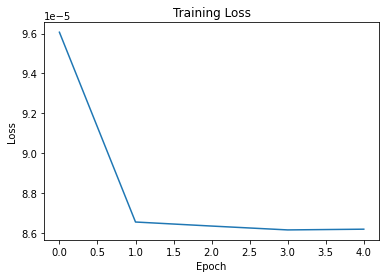

6500/6500 [==============================] - 13s 2ms/step


C:\Users\Avinash Rauniyar\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


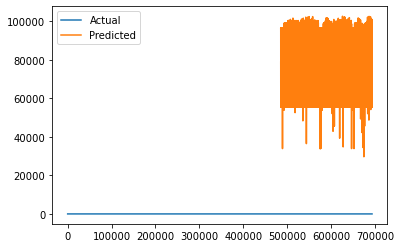

RMSE: 84891.19
SMAPE: 200.00%
MAPE: 1681838484.03%


In [28]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Avinash Rauniyar\Desktop\Spring 2023\Capstone\Fujian\OneDrive_2023-01-26\FHLB Data\Final Data Kumar.csv")

# Create a new feature 'HousePrice'
df['HousePrice'] = df['NoteAmount'] / (df['LTVRatioPercent'] / 100)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['HousePrice'] = scaler.fit_transform(df['HousePrice'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(df) * 0.7)
X_train, y_train = df[['TotalDebtExpenseRatioPercent', 'Year']][:train_size], df[['HousePrice']][1:train_size+1]
X_test, y_test = df[['TotalDebtExpenseRatioPercent', 'Year']][train_size:-1], df[['HousePrice']][train_size+1:]

# Reshape the data
X_train = X_train.values.reshape(-1, 2, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 2, 1)
y_test = y_test.values.reshape(-1, 1)

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(50, input_shape=(2, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model and store the history
history = model.fit(X_train, y_train, epochs=2000, batch_size=1, verbose=2)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Make predictions on the test data
predicted_values = model.predict(X_test)

# Invert the scaling of the predictions
predicted_values = scaler.inverse_transform(predicted_values)

# Plot the actual and predicted values
plt.plot(df['HousePrice'], label='Actual')
plt.plot([None for i in X_train] + [x for x in predicted_values], label='Predicted')
plt.legend()
plt.show()

# Calculate RMSE
mse = mean_squared_error(y_test, predicted_values)
rmse = math.sqrt(mse)

# Calculate SMAPE
smape = np.mean(np.abs(y_test - predicted_values) / ((np.abs(y_test) + np.abs(predicted_values))/2)) * 100

# Calculate MAPE
mape = np.mean(np.abs(y_test - predicted_values) / np.abs(y_test)) * 100

print("RMSE: {:.2f}".format(rmse))
print("SMAPE: {:.2f}%".format(smape))
print("MAPE: {:.2f}%".format(mape))
